## **Exploratory analysis and prediction on the "TMDB 5000 Movie Dataset" dataset**

***Authors: Bava Flavio 4836427 , Ciarlo Francesco 4640121, Oldrini Edoardo 4055097***

**Abstract**

The following data analysis aims to study an approach for the production of a movie.<br><br>
This file is divided like so:
* Dataset checking and preparation
* Initial exploration of the dataset
* Raising hypotheses and subsequent verification
* Proposal for a predictive regression based on previous observations

**Importing libraries and datasets**

In [906]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # used for plot interactive graph.
import numpy as np 
import plotly.offline as py 
import json
from plotnine import ggplot,aes,facet_grid,labs,geom_col,theme_xkcd
py.init_notebook_mode(connected=True) #TODO ????
import plotly.graph_objs as go
import warnings #TODO ????
warnings.filterwarnings('ignore') #TODO ????
from pylab import rcParams #TODO ????
from ast import literal_eval

In [907]:
Movies = pd.read_csv('tmdb_5000_movies.csv')

### **Exploratory analysis of the dataset**

Controlliamo dimensione dataset

In [908]:
Movies['genres']=Movies['genres'].apply(json.loads)
for index,i in zip(Movies.index,Movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    Movies.loc[index,'genres']=str(list1)

Movies['keywords']=Movies['keywords'].apply(json.loads)
for index,i in zip(Movies.index,Movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    Movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
Movies['production_companies']=Movies['production_companies'].apply(json.loads)
for index,i in zip(Movies.index,Movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    Movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
Movies['production_countries']=Movies['production_countries'].apply(json.loads)
for index,i in zip(Movies.index,Movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['iso_3166_1']))
    Movies.loc[index,'production_countries']=str(list1)

In [909]:
print(Movies.shape)
Movies.head(2)


(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['US', 'GB']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['US'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


dimensioni = 

1. Controlliamo chei tipi siano giusti

In [910]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

I tipi sono coerenti

2. Controlliamo se ci sono dati mancanti

In [911]:
print(Movies.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


ci sono alcuni valori nulli ma in colonne che potrebbero non essere significative

3. Controlliamo che i budget abbiano valori sensati

In [912]:
#TODO possibile predizione buget come studio
print(Movies['budget'].describe())

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


Il valore minimo è 0, abbiamo quindi il dubbbio che ci siano budget con valori insiensati, per conoscenza del dominio applciativo decidiamo di porre il limite inferiore di 10k per il budget, verifichiamo quanti film sono sotto a questo valore.

In [913]:
#print(Movies[Movies['budget']<10000]['id'].count())
Movies.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"['Action', 'Crime', 'Thriller']",NaN,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],"['MX', 'US']",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"['Comedy', 'Romance']",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"['Comedy', 'Drama', 'Romance', 'TV Movie']",http://www.hallmarkchannel.com/signedsealeddel...,231617,"['date', 'love at first sight', 'narration', '...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['Front Street Pictures', 'Muse Entertainment ...",['US'],2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"['US', 'CN']",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,['Documentary'],NaN,25975,"['obsession', 'camcorder', 'crush', 'dream girl']",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"['rusty bear entertainment', 'lucky crow films']",['US'],2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


Ci sono 1400 film con un valore di budget che non sembra avere senso, per evitare di eliminare tutti i dati relativi a questo film decidiamo di "segnare" ponendo il budget ad un valore simbolico di -1 questi dati in modo da non prenderli in considerazione nelle statistiche ma non perdere altri dati interesanti.

In [914]:
#Movies[Movies['budget'] <= 10000]['budget'] = np.nan
for row in Movies.index:
    if Movies.loc[row,'budget'] < 10000 and (Movies.loc[row, 'status']=='Released'):
        Movies.loc[row,'budget'] = np.nan
print(Movies[Movies['budget'] == np.nan].shape)

(0, 20)


4. Controlliamo che i revenue abbiano valori sensati

In [915]:
#TODO possibile predizione buget come studio
Movies.tail()
#print(Movies['revenue'].describe())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000.0,"['Action', 'Crime', 'Thriller']",NaN,9367,"['united states–mexico barrier', 'legs', 'arms...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,['Columbia Pictures'],"['MX', 'US']",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,NaN,"['Comedy', 'Romance']",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,NaN,"['Comedy', 'Drama', 'Romance', 'TV Movie']",http://www.hallmarkchannel.com/signedsealeddel...,231617,"['date', 'love at first sight', 'narration', '...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"['Front Street Pictures', 'Muse Entertainment ...",['US'],2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,NaN,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"['US', 'CN']",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,NaN,['Documentary'],NaN,25975,"['obsession', 'camcorder', 'crush', 'dream girl']",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"['rusty bear entertainment', 'lucky crow films']",['US'],2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


molti film hanno revenue nullo, che siano film ancora non usciti?

In [916]:
print(Movies[Movies['revenue'] == 0].shape)
print(Movies[(Movies['revenue'] == 0) & (Movies['status']!= 'Released')].shape)

(1427, 20)
(7, 20)


Su 1427 film che hanno revenue = 0 solo 7 sono ancora in fase di produzione, quindi 1427 film hanno un valore di revenue errato che procediamo a segnare, come visto precedentemente, con un valore simbolico di -1

In [917]:
for row in Movies.index:
    if (Movies.loc[row, 'revenue'] == 0) and (Movies.loc[row, 'status']=='Released'):
        Movies.loc[row, 'revenue'] = -1

print(Movies[Movies['revenue'] == -1].shape)


(1420, 20)


3. Ulteriori aggiustamenti

Budget:<br>
Aggiungiamo due colonne legate al budget, una misura i ricavi sulla percentuale rispetto al budget, l'altra divide i film in 3 categorie, low budget, normali e blockbuster


1) Ricavi rispetto al budget


In [918]:
def calculate_profit_perc(x):
    if (x.revenue>0) and (x.budget>0):
        return ((x.revenue-x.budget)/x.budget)*100
    #senza else mette i nan, altrimenti possiamo metterlo e ritornare -1

In [919]:
#Movies = Movies.assign(profit_perc = lambda x: (((x.revenue-x.budget)/x.budget)*100) if ((x.revenue>0) and (x.budget>0)) else -1)
#print(Movies[Movies['budget'].isnull()])
Movies = Movies.assign(profit_perc = lambda x: x.budget)
for row in Movies.index:
    Movies.loc[row,'profit_perc'] =  calculate_profit_perc(Movies.loc[row])



2. Classificazioni film in low, med, high budget

usiamo describe per capire come impostare gli scaglioni

In [920]:
Movies[Movies['budget']>0].describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit_perc
count,3.731000e+03,3731.000000,3731.000000,3.731000e+03,3730.000000,3731.000000,3731.000000,3.214000e+03
mean,3.739032e+07,49656.691772,26.189428,1.049244e+08,109.452279,6.234173,863.715090,1.009349e+03
std,4.269420e+07,81359.132806,34.528566,1.781875e+08,20.748530,0.939815,1348.896111,2.399545e+04
min,1.000000e+04,5.000000,0.001586,-1.000000e+00,0.000000,0.000000,0.000000,-9.999995e+01
25%,8.850000e+06,6970.000000,8.188171,6.800000e+06,95.000000,5.700000,119.000000,2.586393e+00
50%,2.400000e+07,11969.000000,17.709888,3.946244e+07,106.000000,6.300000,372.000000,1.300444e+02
75%,5.000000e+07,49043.500000,34.115251,1.227800e+08,120.000000,6.900000,978.500000,3.416902e+02
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,1.288939e+06


Low budget = 25% con budget più bassi<br>
High budget = 25% con budget più alti<br>
Medio = il restante 50%

In [921]:
def budget_range(x):
    if x <= 0: #x==NaN
        return "no budget info"
    if x < 7.900000e+05:
        return "low"
    elif x >= 7.900000e+05 and x < 4.000000e+07:
        return "medium"
    else:
        return "high"

aggiungiamo una colonna che contiene l'etichetta relativa al budget

In [922]:
Movies = Movies.assign(budget_class = lambda x: str(x.budget))
for row in Movies.index:
    Movies.loc[row,'budget_class'] =  budget_range(Movies.loc[row,'budget'])


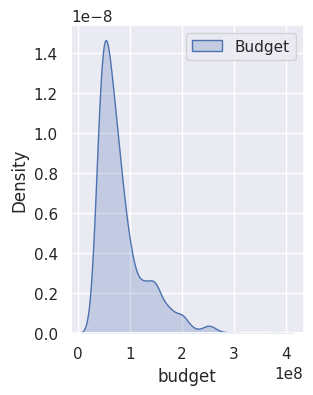

In [923]:
#TODO: a cosa serve sta roba?
sns.kdeplot(data=Movies[Movies['budget'] >= 4.000000e+07], x='budget', shade = True)
plt.legend(['Budget'])
plt.show()


In [924]:
q = Movies[Movies['budget']<=1000]
print(q[q['revenue']!=0]['title'])

Series([], Name: title, dtype: object)


In [925]:
#Movies['budget'].describe()
#Movies[Movies['budget'] <= 7.900000e+05].shape
#Movies[(Movies['budget'] <= 1.500000e+07) & Movies['budget']<= 4.000000e+07].shape
#Movies[(Movies['budget'] >=   1.500000e+07) & (Movies['budget'] <= 4.000000e+07)].shape
#print(11 in range(0,10))
#Movies([Movies['budget'] >= 1.500000e+07] and (Movies['budget'] <= 4.000000e+07)).shape


Riteniamo importante che la media dei voti sia pesata con il numero di voti che la generano, per fare questo usiamo una formula consigliata dal celebre sito IMBD e togliamo le due colonne average e count e le uniamo in una che le metta insieme

In [926]:
C= Movies['vote_average'].mean()
C
m= Movies['vote_count'].quantile(0.5)
m
q_movies = Movies.copy().loc[Movies['vote_count'] >= m]
q_movies.shape
q_movies['vote_count'].describe()
print(q_movies.shape)

(2407, 22)


In [927]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [928]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.drop(['vote_average','vote_count'],inplace=True,axis='columns')
#q_movies[q_movies['vote_count']<280].head(10)
q_movies.shape

(2407, 21)

Abbiamo eliminato metà dei film, quelli con troppi pochi voti per poter essere presi in considerazione per quanto riguarda il voto ricevuto.

Breve sguardo agli attributi quantitativi

In [929]:
Movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit_perc
count,3.736000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,3.214000e+03
mean,3.734028e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,1.009349e+03
std,4.268752e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,2.399545e+04
min,0.000000e+00,5.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,-9.999995e+01
25%,8.500000e+06,9014.500000,4.668070,-1.000000e+00,94.000000,5.600000,54.000000,2.586393e+00
50%,2.300000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,1.300444e+02
75%,5.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,3.416902e+02
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,1.288939e+06


### **Cominciamo a fare qualche ipotesi**

**1. Dati qualitativi**

Proviamo a definire delle funzioni per verificare la distribuzione di voti e soldoni fatti in base ai dati qualitativi

In [930]:
feat_to_manage = ['genres','keywords','production_countries','production_companies']

In [931]:
for f in feat_to_manage:
    Movies[f] = Movies[f].apply(literal_eval)

In [932]:
#def get_name(x):
 #   if isinstance(x, list):
  #      names = [i['name'] for i in x]
   #     return names
    #return []

Primo qualitativo: generi


In [933]:
def genre_average_revenue(genre):
    sum = 0
    count = 0
    for row in Movies.index:
        if (genre in Movies.loc[row, 'genres']) and (Movies.loc[row,'profit_perc'] > 0):
            sum += Movies.loc[row, 'profit_perc']
            count+=1
    return count


In [934]:

genres=[]
for row in Movies.index:
    _gen = Movies.loc[row,'genres']
    for g in _gen:
        if g not in genres:
            genres.append(g)



profits=[]
for g in genres:
    profits.append(genre_average_revenue(g))
            



print(genres)  
print(profits)

['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']
[693, 524, 274, 329, 387, 1013, 694, 150, 297, 40, 843, 434, 270, 191, 102, 85, 84, 26, 0, 0]


Eliminiamo quei generi per i quali le quantità di film sono non influenti,quindi TV Movie e Foreign

In [935]:
genres.remove(genres[19])
genres.remove(genres[18])
profits.remove(profits[19])
profits.remove(profits[18])

Di seguito possiamo vedere come sono i profitti in base ai diversi generi dei film

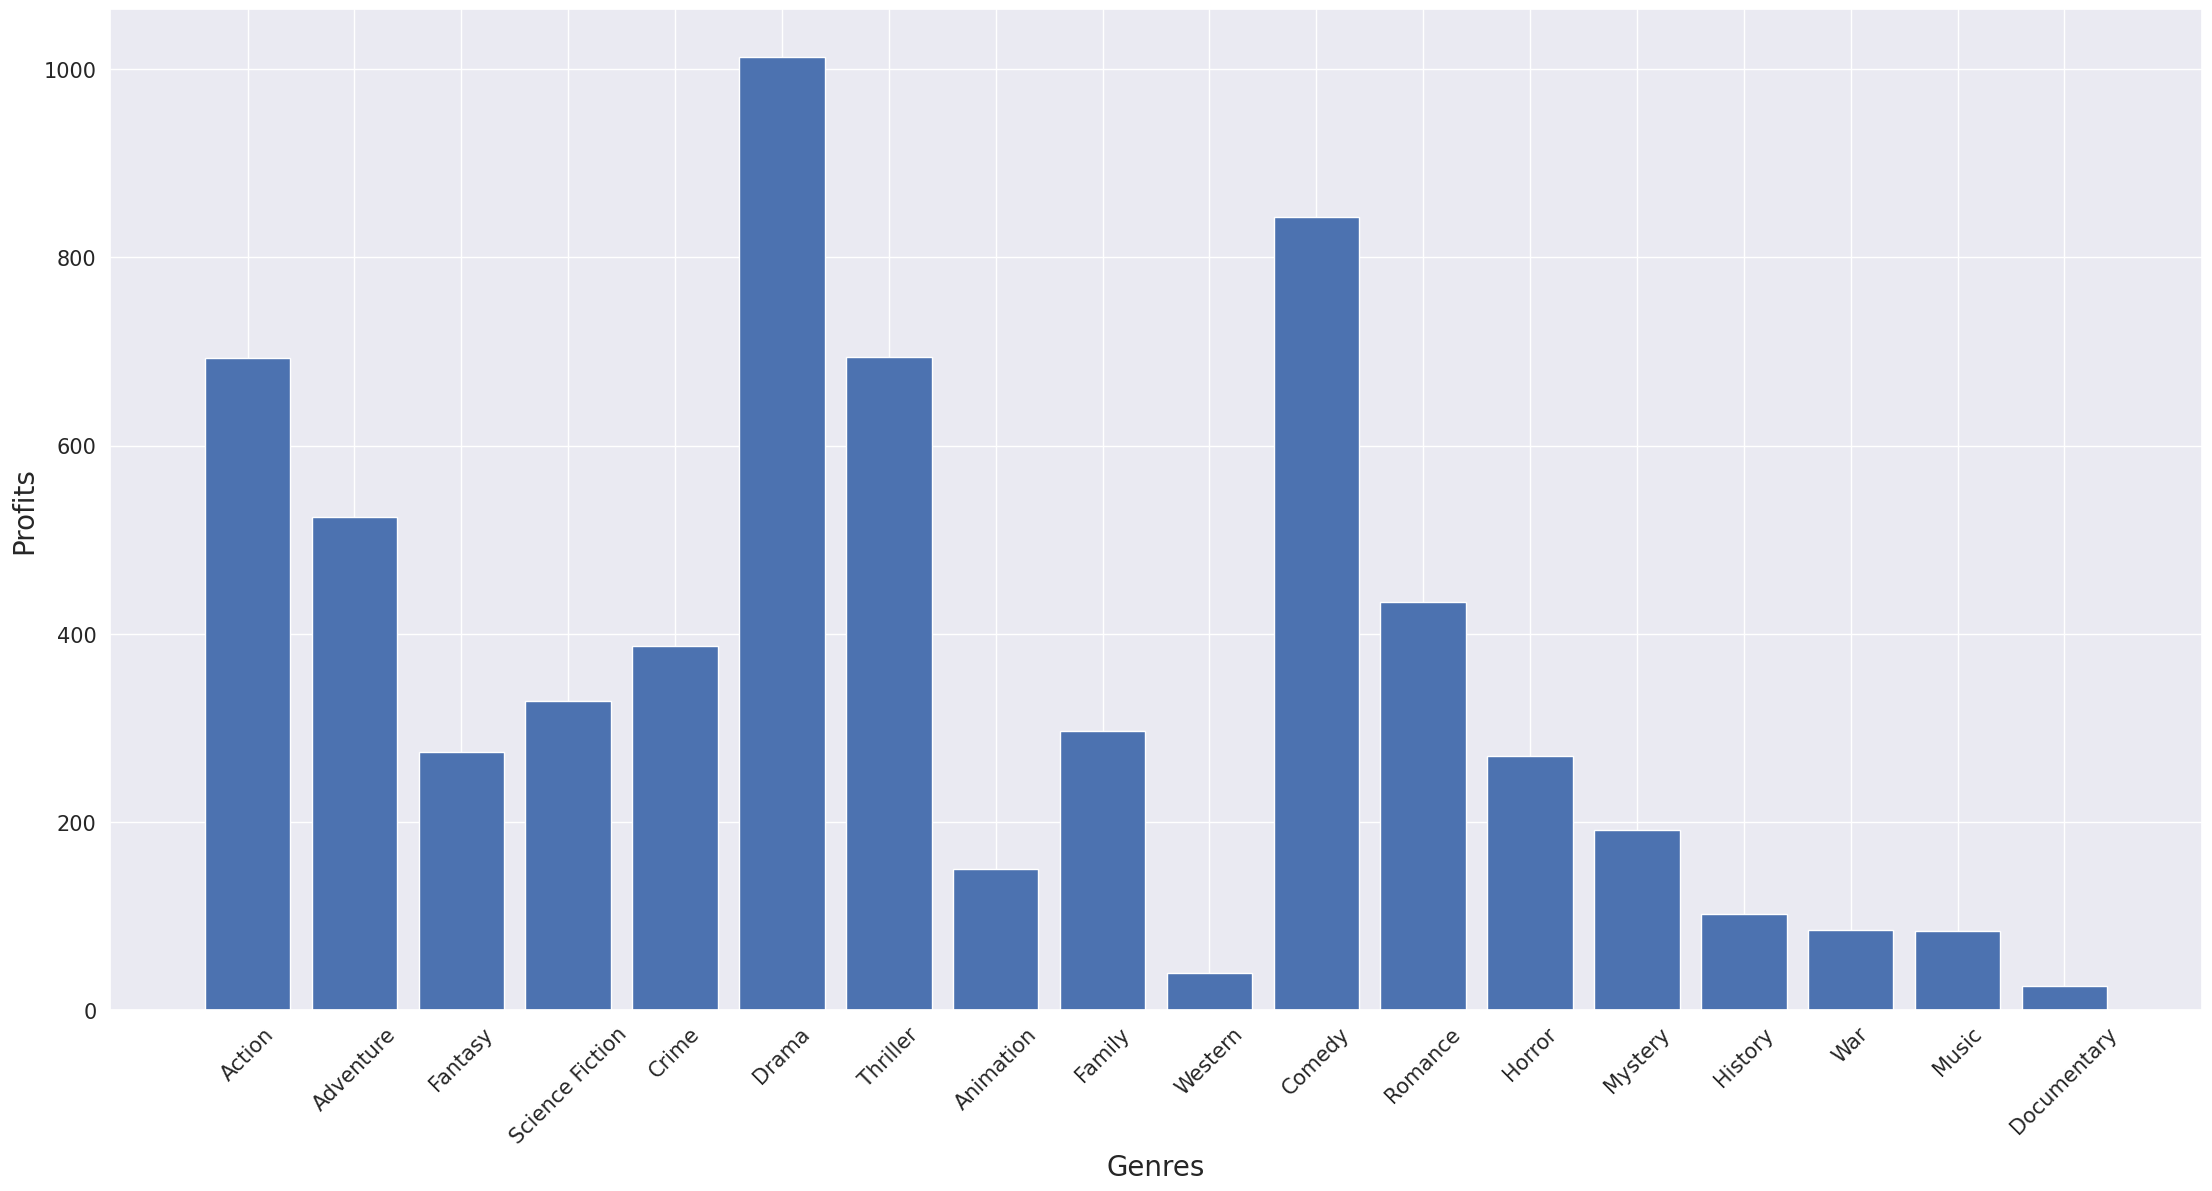

In [936]:
fig, ax = plt.subplots()
ax.bar(genres,profits)
fig.set_figwidth(27)
fig.set_figheight(13)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Profits", fontsize=20)
plt.show()

Droppiamo colonne inutili //da portare sotto all'aggiuntra delle nuove colonne

In [937]:
Movies.drop(['homepage','spoken_languages','original_title'],inplace=True,axis='columns')
Movies.shape

(4803, 19)

In [938]:
for row in Movies.index:
    if (Movies.loc[row, 'profit_perc'] <= 0) and (Movies.loc[row, 'status']=='Released'):
        Movies.loc[row, 'profit_perc'] = np.nan

Logaritmi

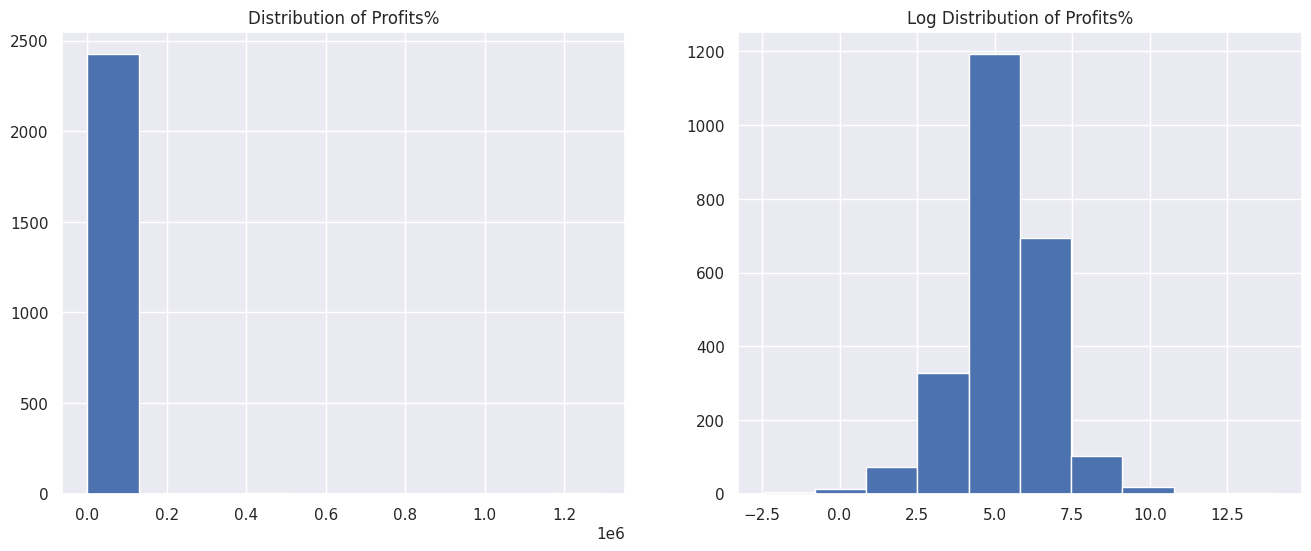

In [939]:
Movies['log_perc'] = np.log(Movies['profit_perc'])
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1,2,1)
plt.hist(Movies['profit_perc'])
plt.title('Distribution of Profits%')
plt.subplot(1,2,2)
plt.hist(Movies['log_perc'])
plt.title('Log Distribution of Profits%')
plt.show()



In [940]:
print('Skewness : %f '% Movies['profit_perc'].skew())
print('Applied Log Skewness : %f '% Movies['log_perc'].skew())


Skewness : 43.271624 
Applied Log Skewness : -0.229524 


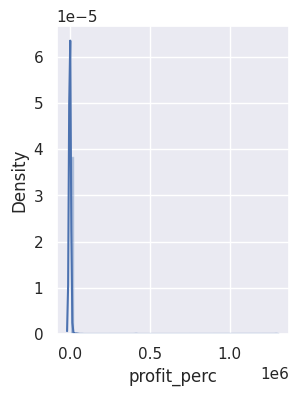

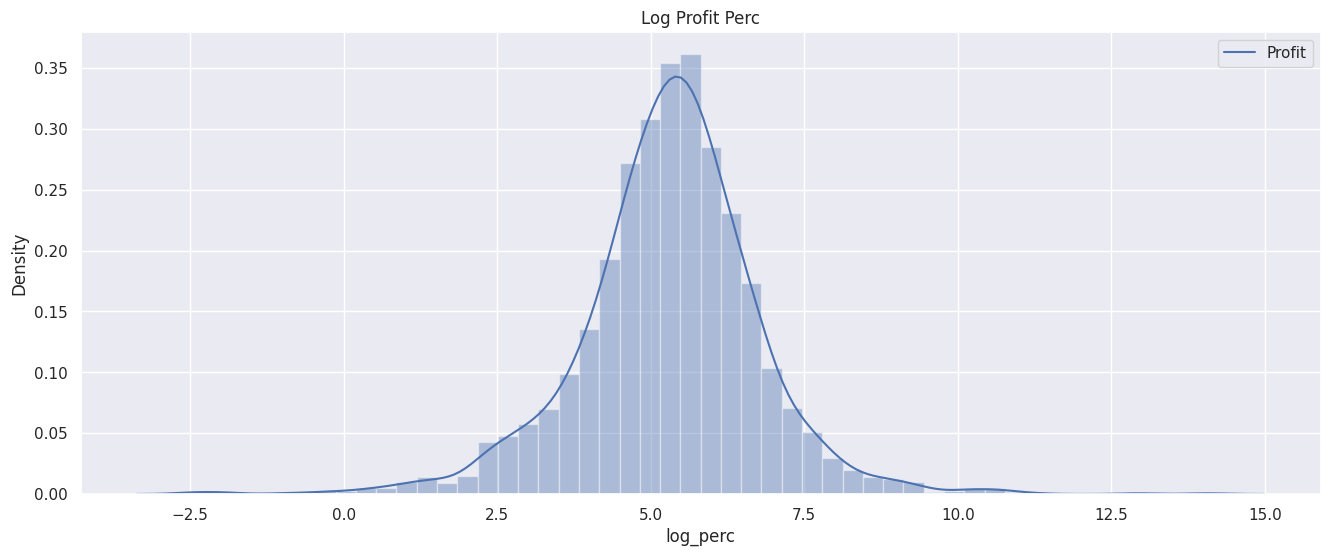

In [941]:
sns.distplot(Movies['profit_perc'])
plt.figure(figsize=(16,6))
plt.legend(['Profit'])
plt.title('Profit Perc')
sns.distplot(Movies['log_perc'])
plt.legend(['Profit'])
plt.title('Log Profit Perc')
plt.show()

In [942]:
keywords=[]
for row in Movies.index:
    _key = Movies.loc[row,'keywords']
    for k in _key:
        if g not in keywords:
            keywords.append(k)
print(len(keywords))

36194


In [943]:
from collections import Counter
Counter(keywords).most_common(30)

[('woman director', 324),
 ('independent film', 318),
 ('duringcreditsstinger', 307),
 ('based on novel', 197),
 ('murder', 189),
 ('aftercreditsstinger', 170),
 ('violence', 150),
 ('dystopia', 139),
 ('sport', 126),
 ('revenge', 118),
 ('sex', 111),
 ('friendship', 106),
 ('musical', 105),
 ('biography', 105),
 ('teenager', 99),
 ('3d', 98),
 ('love', 95),
 ('sequel', 94),
 ('suspense', 92),
 ('new york', 89),
 ('police', 84),
 ('los angeles', 81),
 ('high school', 80),
 ('alien', 76),
 ('prison', 72),
 ('nudity', 71),
 ('superhero', 69),
 ('family', 69),
 ('london england', 69),
 ('drug', 69)]

In [944]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

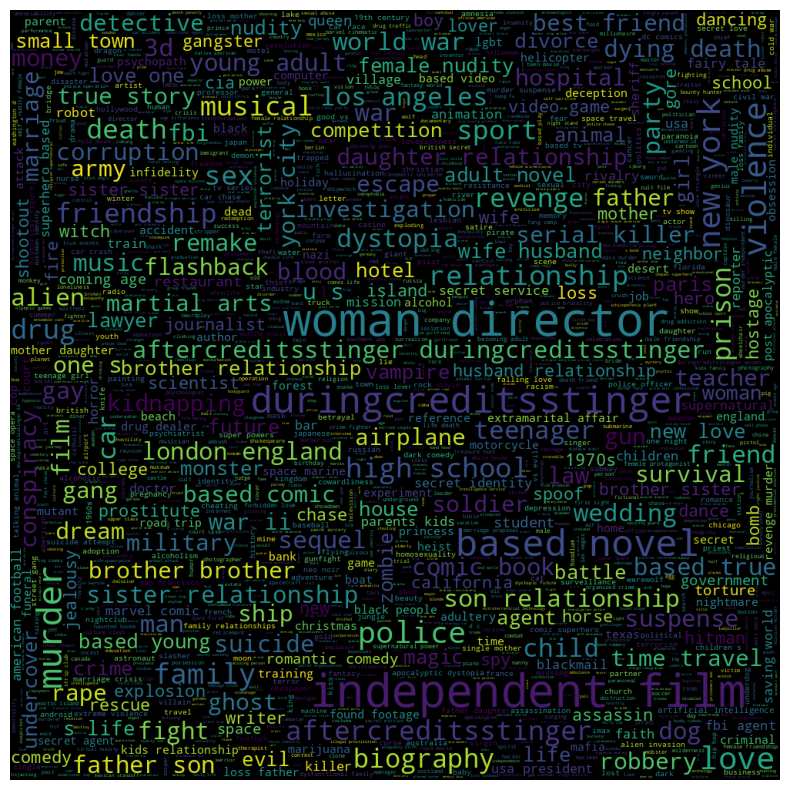

In [945]:
plt.subplots(figsize=(12,12))
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

Movies['keywords'].dropna(inplace=True)
Movies['keywords'] = Movies['keywords'].astype(str)
words=Movies['keywords'].apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=4000,stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

**Iniziamo a lavorare con il dataset contenente il cast e il direttore**

In [946]:
cast = pd.read_csv("tmdb_5000_credits.csv")

In [947]:
cast['cast']=cast['cast'].apply(json.loads)
for index,i in zip(cast.index,cast['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    cast.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
cast['crew']=cast['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
cast['crew']=cast['crew'].apply(director)
cast.rename(columns={'crew':'director'},inplace=True)
cast.rename(columns={"movie_id":"id"},inplace=True)
cast.drop('title',inplace=True,axis=1)

In [948]:
Movies=pd.merge(Movies,cast,on="id",how='inner')# merging the two csv 


In [949]:
Movies['cast']=Movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
Movies['cast']=Movies['cast'].str.split(',')

Let's see how many times actors appears in different films

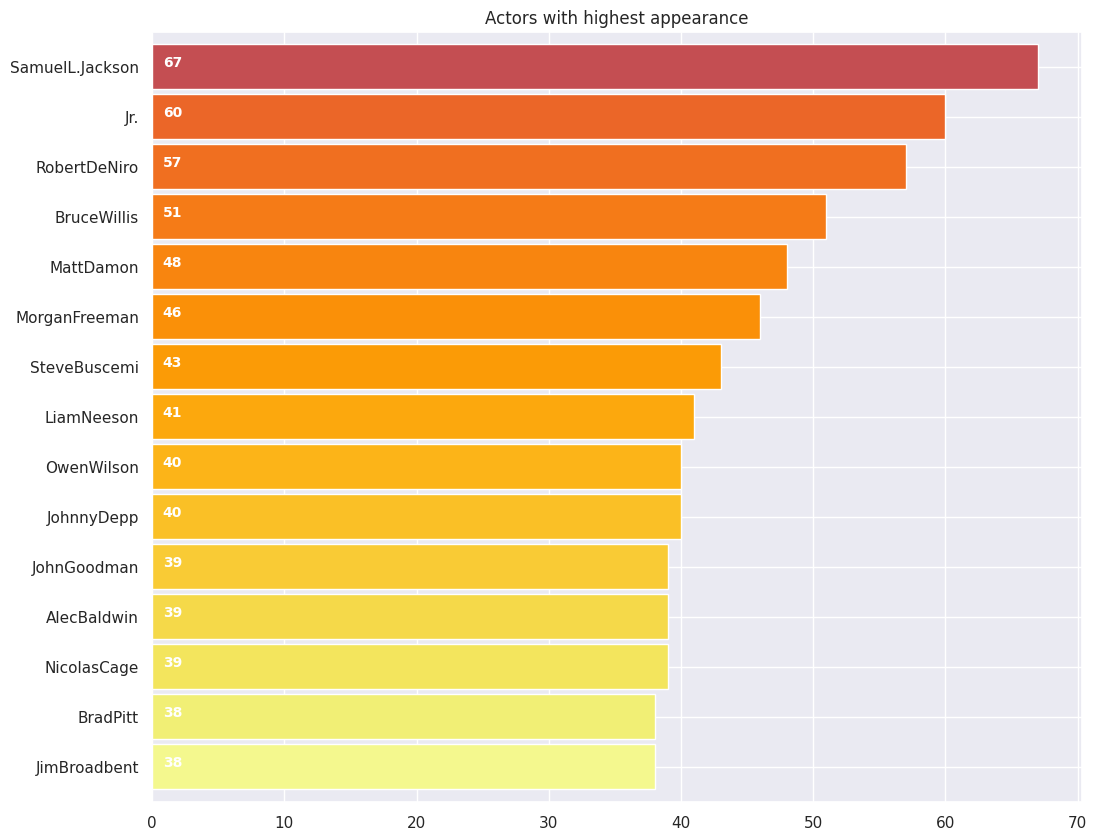

In [950]:

list1=[]

for i in Movies['cast']:
    list1.extend(i)

list1 = list(filter(None, list1))

plt.subplots(figsize=(12,10))
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno_r',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')

plt.title('Actors with highest appearance')
ax.patches[14].set_facecolor('r')
plt.show()


In [ ]:
list1.sort()
list1

In [581]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
Movies['director']=Movies['director'].apply(xstr)

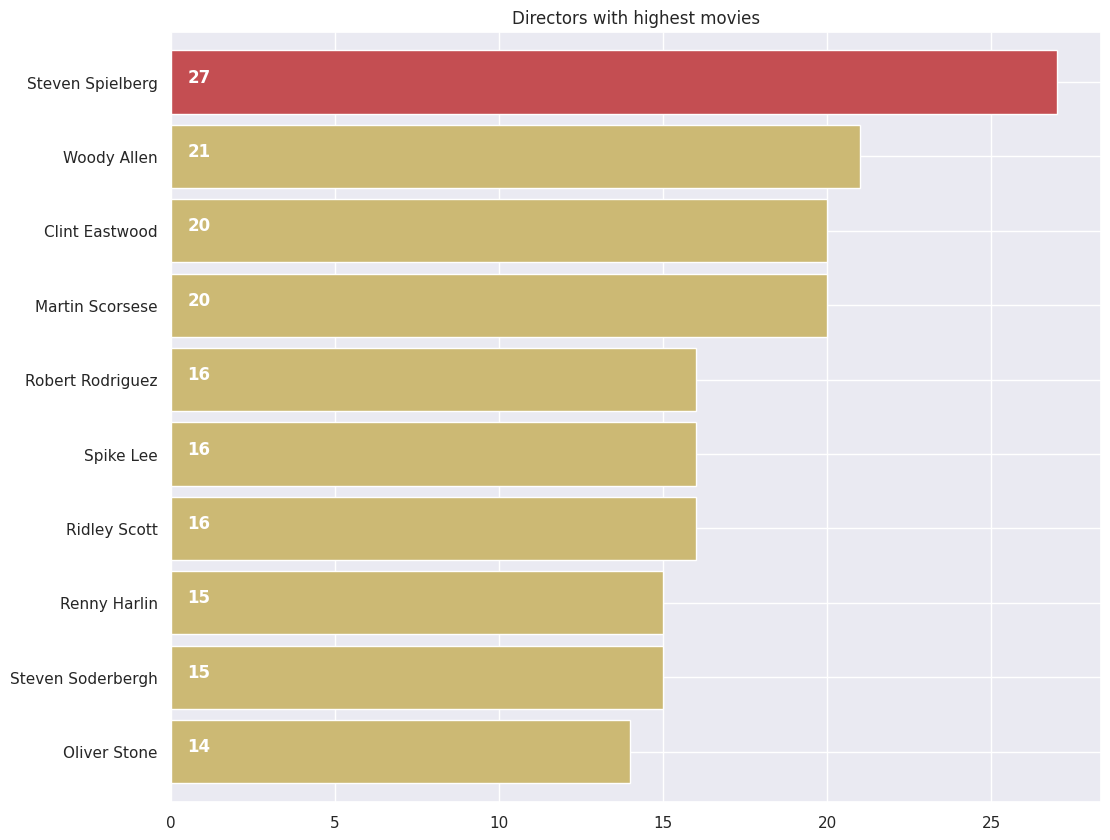

In [582]:
plt.subplots(figsize=(12,10))
ax=Movies[Movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.85,color='inferno_r')
for i, v in enumerate(Movies[Movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Directors with highest movies')
plt.show()


In [ ]:
""" #funzione pesantissima con hash
key_profits={} #declared as hashmap
bad_keys=[]
for k in keywords_set:
    q = keyword_average_revenue(k)
    if q != -1:
        key_profits[str(k)]=q
    else:
        bad_keys.append(k) """

In [ ]:
""" popo=pd.DataFrame(key_profits)
popo.to_csv('key_prof_hashmap.csv')

print(len(key_profits)) """

In [ ]:
sorted_key_hash = sorted(key_profits.items(), key=lambda x: x[1])
print(sorted_key_hash)

In [ ]:
#print(key_profits)
#print(key_profits['independent film'])
#Movies.tail(10)

In [ ]:
from collections import Counter
Counter(keywords).most_common(30)

In [ ]:
best = 100
most_comm_key = Counter(keywords).most_common(best)
most_comm_key_tiprego = []
for i in range(0,best-1):
    #print(most_comm_key[0])
    most_comm_key_tiprego.append(most_comm_key[i][0])
print(most_comm_key_tiprego)


In [ ]:
most_comm_key_prof = []
for el in most_comm_key_tiprego:
    most_comm_key_prof.append(key_profits[str(el)])


In [ ]:
for row in Movies.index:
    if 'witch' in Movies.loc[row, 'keywords']:
        print(Movies.loc[row, 'title'])

In [ ]:
fig, ax = plt.subplots()
ax.bar(most_comm_key_tiprego,most_comm_key_prof)
fig.set_figwidth(27)
fig.set_figheight(13)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("key", fontsize=20)
plt.ylabel("Profits", fontsize=20)
plt.show()

In [ ]:
key_profits = pd.read_csv('key_profits.csv')['0']
bad_key_df = pd.read_csv('bad_key.csv')
bad_key=bad_key_df['0']


In [ ]:
set_key = set(keywords)
print(len(set_key))
bad_key_set = set(bad_key)
print(len(bad_key_set))
set_key_cleaned = set_key - bad_key_set
print(len(set_key_cleaned))
print(len(key_profits))

print(len(keywords))
#pd.DataFrame(key_profits).to_csv("key_profits.csv")

fare film con pochi soldi e una strega lesbicona bella nuda 

In [ ]:
#TODO: studiare influenza titolo e profitto/voti
fig, ax = plt.subplots()
ax.bar(keywords,key_profits)
fig.set_figwidth(27)
fig.set_figheight(13)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Genres", fontsize=20)
plt.ylabel("Profits", fontsize=20)
plt.show()

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (12, 12))
token_keywords = ' '.join(Movies['title'].values) 
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_keywords)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()

In [ ]:
########### ISO
#questa cambia la rappresentazione nel dataset, non ritorna una cippa
#def get_ISO(x):
 #   if isinstance(x, list):
  #      isos = [i['iso_3166_1'] for i in x]
   #     return isos
    #return []

In [ ]:
Movies.head(1)
print(Movies[Movies['title']=='Avatar'])

In [ ]:
countries=[]
for row in Movies.index:
    _countries = Movies.loc[row,'production_countries']
    for k in _countries:
        if k not in countries:
            countries.append(k)

print(len(countries))
print(len(set(countries)))
print(countries)

In [ ]:
def country_average_revenue(country):
    sum = 0
    count = 0
    for row in Movies.index:
        if (country in Movies.loc[row, 'production_countries'] and Movies.loc[row, 'profit_perc'] >= 0):
            sum += Movies.loc[row, 'profit_perc']
            count+=1
    if count != 0:
        return sum/count
    else:
        return -1

In [ ]:
country_profits={} #declared as hashmap
bad_countries=[]
for c in countries:
    q = country_average_revenue(c)
    if q != -1:
        country_profits[str(c)]=q
    else:
        bad_countries.append(c)

In [ ]:
#print(country_profits['BO'])
#print(bad_countries)

set_countries = set(countries)
print(len(set_countries))
bad_countries_set = set(bad_countries)
print(len(bad_countries_set))
set_countries_cleaned = set_countries - bad_countries_set
print(len(set_countries_cleaned))
print(len(country_profits))

#print(len(keywords))

In [ ]:
for row in Movies.index:
    if 'JM' in Movies.loc[row,'production_countries']:
        print(Movies.loc[row,'profit_perc'])

In [ ]:
ti_prego_dai = []
for el in set_countries_cleaned:
    ti_prego_dai.append(country_profits[str(el)])



fig, ax = plt.subplots()
ax.bar(list(set_countries_cleaned),list(ti_prego_dai))
fig.set_figwidth(20)
fig.set_figheight(13)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("key", fontsize=20)
plt.ylabel("Profits", fontsize=20)
plt.show()


""" fig, ax = plt.subplots()
ax.bar(most_comm_key_tiprego,most_comm_key_prof)
fig.set_figwidth(27)
fig.set_figheight(13)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("key", fontsize=20)
plt.ylabel("Profits", fontsize=20)
plt.show() """

#TOTO: 

Toccherà caccaire nel cesso le hashmap

trovare modo per selezionare solo le country utili (con abbastanza film)

#mettere al posto dei -1 i NaN ma solo nella singola colonna non su tutta la riga
 
Qualitativi --> plot e contare, no correlazioni

sarebbe carino trovare sia le key con più profitto tra le più comuni sia le più comuni tra quelle con più profitto

#Eliminare valori inutile e insensati anche per revenue e "segnarli"
#Ricalcolare profit selezinando solo i film con valori sensati (!=-1)

Plottare profitto in base a:
    #genere
    keyword
    paese prod
    lingua originale (forse)

Plottare count dei generi in per ogni paese di prod (ad esempio giappone potrebbe avere più animazione della GB)

\************************************************

Dati quantitativi --> matematica:

Provare corr tra profitto(non revenue) e budget 
Provare corr tra profitto(non revenue) e score 
Provare corr tra profitto(non revenue) e popularity 

.
.
.
.

usiamo tutte le verità scoperte per fare varie predizioni
